In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import datetime as dt

### Dataset

In [193]:
train_set = pd.read_csv('merge_feature_210913.csv' , index_col = 0 )
test_set = pd.read_csv('testdata_210911.csv')   #prophet

In [205]:
# train_set
train_set.columns

Index(['base_date', 'emd_nm', 'em_g', 'youth_pop', 'total_frgn_pop',
       'total_pop', 'jeju_resd_pop', 'card_use_amt', 'delivery_amt',
       'market_amt', 'card_use_cnt', 'delivery_cnt', 'market_cnt', 'em_cnt',
       'pay_amt', 'visit_pop', 'work_pop'],
      dtype='object')

In [206]:
train_set['year'] = pd.to_datetime(train_set.base_date).dt.year
train_set['month'] = pd.to_datetime(train_set.base_date).dt.month
train_set['date'] = pd.to_datetime(train_set.base_date).dt.day
train_set = train_set[['year','month','date','emd_nm', 'em_g', 'youth_pop', 'total_frgn_pop',
       'total_pop', 'jeju_resd_pop', 'card_use_amt', 'delivery_amt',
       'market_amt', 'card_use_cnt', 'delivery_cnt', 'market_cnt', 'em_cnt',
       'pay_amt', 'visit_pop', 'work_pop']]


test_set['year'] = pd.to_datetime(test_set.base_date).dt.year
test_set['month'] = pd.to_datetime(test_set.base_date).dt.month
test_set['date'] = pd.to_datetime(test_set.base_date).dt.day
test_set =test_set[['year', 'month', 'date','emd_nm', 'card_use_cnt', 'delivery_per_cnt',
       'market_per_cnt', 'visit_ratio', 'frgn_ratio', 'youth_ratio',
       'total_pop', '제주_resd_ratio', '제주_resd_pop']]

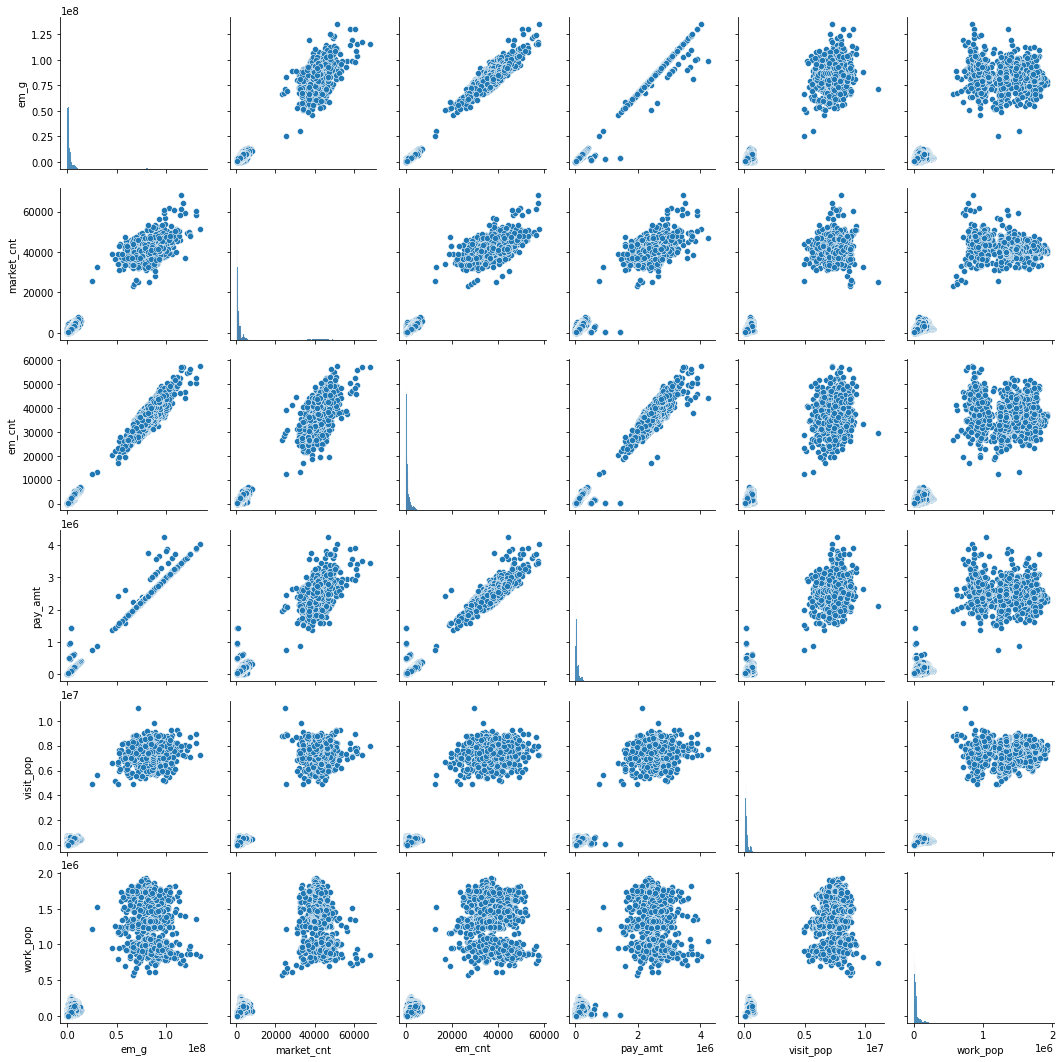

In [230]:
sns.pairplot(train_set[['em_g','market_cnt', 'em_cnt',
       'pay_amt', 'visit_pop', 'work_pop']])

In [232]:
feature_df = train_set.drop(['em_g'],axis =1)
target_df = train_set[['em_g']]

array([[<AxesSubplot:title={'center':'em_g'}>]], dtype=object)

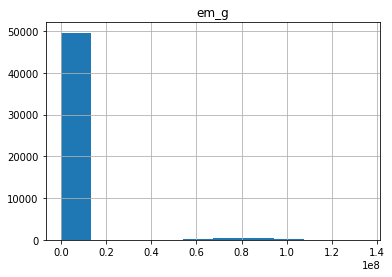

In [234]:
target_df.hist()

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'youth_pop'}>],
       [<AxesSubplot:title={'center':'total_frgn_pop'}>,
        <AxesSubplot:title={'center':'total_pop'}>,
        <AxesSubplot:title={'center':'jeju_resd_pop'}>,
        <AxesSubplot:title={'center':'card_use_amt'}>],
       [<AxesSubplot:title={'center':'delivery_amt'}>,
        <AxesSubplot:title={'center':'market_amt'}>,
        <AxesSubplot:title={'center':'card_use_cnt'}>,
        <AxesSubplot:title={'center':'delivery_cnt'}>],
       [<AxesSubplot:title={'center':'market_cnt'}>,
        <AxesSubplot:title={'center':'em_cnt'}>,
        <AxesSubplot:title={'center':'pay_amt'}>,
        <AxesSubplot:title={'center':'visit_pop'}>],
       [<AxesSubplot:title={'center':'work_pop'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

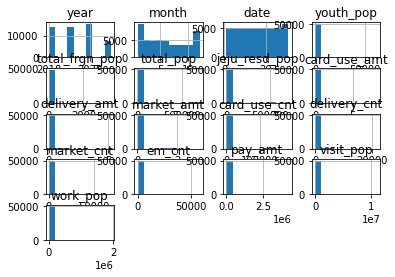

In [235]:
feature_df.hist()

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'youth_pop'}>],
       [<AxesSubplot:title={'center':'total_frgn_pop'}>,
        <AxesSubplot:title={'center':'total_pop'}>,
        <AxesSubplot:title={'center':'jeju_resd_pop'}>,
        <AxesSubplot:title={'center':'card_use_amt'}>],
       [<AxesSubplot:title={'center':'delivery_amt'}>,
        <AxesSubplot:title={'center':'market_amt'}>,
        <AxesSubplot:title={'center':'card_use_cnt'}>,
        <AxesSubplot:title={'center':'delivery_cnt'}>],
       [<AxesSubplot:title={'center':'market_cnt'}>,
        <AxesSubplot:title={'center':'em_cnt'}>,
        <AxesSubplot:title={'center':'pay_amt'}>,
        <AxesSubplot:title={'center':'visit_pop'}>],
       [<AxesSubplot:title={'center':'work_pop'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

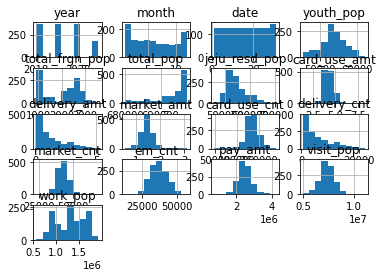

In [219]:
feature_df.hist()

array([[<AxesSubplot:title={'center':'total_pop'}>,
        <AxesSubplot:title={'center':'delivery_per_cnt'}>],
       [<AxesSubplot:title={'center':'frgn_ratio'}>, <AxesSubplot:>]],
      dtype=object)

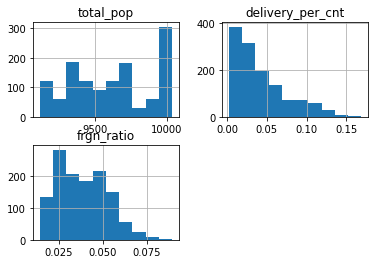

In [164]:
sc = feature_df[['total_pop','delivery_per_cnt','frgn_ratio']]
sc.hist()

In [165]:
sc.describe()

,total_pop,delivery_per_cnt,frgn_ratio
count,1276.000000,1276.000000,1276.000000
mean,9611.754702,0.042269,0.038506
std,293.839826,0.033153,0.013826
min,9110.000000,0.002230,0.014082
25%,9356.000000,0.016787,0.026817
50%,9630.000000,0.031728,0.037187
75%,9906.000000,0.060085,0.049062
max,10038.000000,0.168768,0.089472


#### box_cox 변환

          total_pop  delivery_per_cnt   frgn_ratio
count   1276.000000       1276.000000  1276.000000
mean    9611.754702          0.042269     0.038506
std      293.839826          0.033153     0.013826
min     9110.000000          0.002230     0.014082
25%     9356.000000          0.016787     0.026817
50%     9630.000000          0.031728     0.037187
75%     9906.000000          0.060085     0.049062
max    10038.000000          0.168768     0.089472
total_pop           0.031444
delivery_per_cnt    1.126653
frgn_ratio          0.437320
dtype: float64
-0.02935839754768788
total_pop           0.031444
delivery_per_cnt   -0.058419
frgn_ratio          0.437320
dtype: float64
-0.027467482738877516


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Pleas

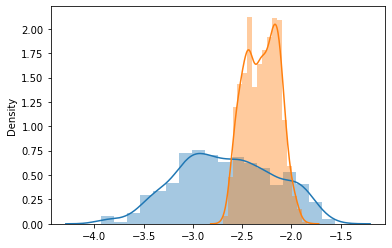

In [153]:
# 최솟값 확인
print(sc.describe())

# 로그 변환
# delivery_per_cnt
sc_delivery_per_cnt_log= pd.Series(stats.boxcox(sc['delivery_per_cnt'])[0])
print(sc.skew())
print(sc_delivery_per_cnt_log.skew())
sns.distplot(sc_delivery_per_cnt_log)
sc['delivery_per_cnt'] = sc_delivery_per_cnt_log

# 로그 변환
# frgn_ratio
sc_frgn_ratio_log= pd.Series(stats.boxcox(sc['frgn_ratio'])[0])
print(sc.skew())
print(sc_frgn_ratio_log.skew())
sns.distplot(sc_frgn_ratio_log)
sc['frgn_ratio'] = sc_frgn_ratio_log

In [154]:
sc

,total_pop,delivery_per_cnt,frgn_ratio
0,10028,-3.852021,-2.280246
38,10028,-2.958870,-2.579497
76,10028,-3.111114,-2.383714
114,10028,-3.603687,-2.243629
152,10028,-3.063551,-2.213481
...,...,...,...
50681,9110,NaN,NaN
50722,9110,NaN,NaN
50763,9110,NaN,NaN
50804,9110,NaN,NaN


#### 로그변환 (딱히 좋아지지 않음)

          total_pop  delivery_per_cnt   frgn_ratio
count   1276.000000       1276.000000  1276.000000
mean    9611.754702          0.042269     0.038506
std      293.839826          0.033153     0.013826
min     9110.000000          0.002230     0.014082
25%     9356.000000          0.016787     0.026817
50%     9630.000000          0.031728     0.037187
75%     9906.000000          0.060085     0.049062
max    10038.000000          0.168768     0.089472
total_pop           0.031444
delivery_per_cnt    1.126653
frgn_ratio          0.437320
dtype: float64
-0.3144318307738456


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


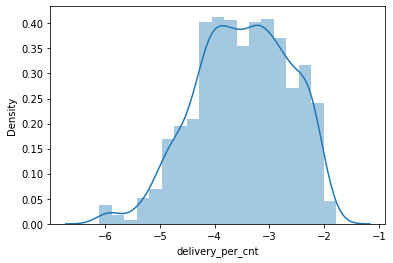

In [166]:
# 로그 변환

# 최솟값 확인
print(sc.describe())

# 로그 변환
# delivery_per_cnt
sc_delivery_per_cnt_log= np.log(sc['delivery_per_cnt'])
print(sc.skew())
print(sc_delivery_per_cnt_log.skew())
sns.distplot(sc_delivery_per_cnt_log)
sc['delivery_per_cnt'] = sc_delivery_per_cnt_log

total_pop           0.031444
delivery_per_cnt   -0.314432
frgn_ratio          0.437320
dtype: float64
-0.16410903708946806


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


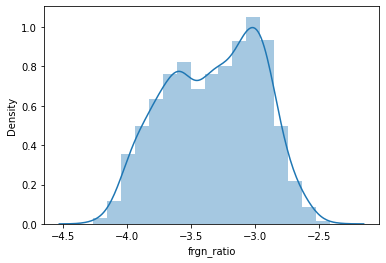

In [167]:
# frgn_ratio
sc_frgn_ratio_log= np.log(sc['frgn_ratio'])
print(sc.skew())
print(sc_frgn_ratio_log.skew())
sns.distplot(sc_frgn_ratio_log)
sc['frgn_ratio'] = sc_frgn_ratio_log

In [169]:
sc

,total_pop,delivery_per_cnt,frgn_ratio
0,10028,-5.889432,-3.259004
38,10028,-4.831180,-3.263707
76,10028,-4.328626,-3.320701
114,10028,-4.763882,-3.232112
152,10028,-4.802928,-3.380379
...,...,...,...
50681,9110,-1.978573,-3.627545
50722,9110,-2.028491,-3.643074
50763,9110,-2.581091,-3.628093
50804,9110,-2.412353,-3.710388


In [170]:
feature_df.head(10)

,year,month,date,total_pop,제주_resd_ratio,제주_resd_pop,visit_ratio,card_use_cnt,delivery_per_cnt,market_per_cnt,frgn_ratio,youth_ratio
0,2018,1,1,10028,0.552623,7274.890502,49.642958,1806.0,0.002769,0.326135,0.038427,0.200261
38,2018,1,2,10028,0.558504,6937.805642,45.943924,1851.0,0.007977,0.322350,0.038246,0.204536
76,2018,1,3,10028,0.560474,6887.890984,45.064675,1896.0,0.013186,0.318565,0.036128,0.200898
114,2018,1,4,10028,0.535209,6636.394075,46.932088,1758.0,0.008532,0.312856,0.039474,0.200176
152,2018,1,5,10028,0.551466,6811.054262,45.995188,1828.0,0.008206,0.362691,0.034035,0.201266
190,2018,1,6,10028,0.555387,6905.558734,47.632161,2123.0,0.009421,0.259067,0.027508,0.199384
228,2018,1,7,10028,0.571867,7262.050706,46.016382,1957.0,0.017374,0.320899,0.027081,0.197210
266,2018,1,8,10028,0.563668,6950.565455,44.097796,1672.0,0.002990,0.313995,0.032742,0.203038
304,2018,1,9,10028,0.571327,6897.401614,44.144204,1821.0,0.010983,0.288303,0.031806,0.203262
342,2018,1,10,10028,0.583872,7056.636888,44.255256,1601.0,0.009369,0.288570,0.030625,0.203374


In [171]:
feature_df['delivery_per_cnt'] = sc['delivery_per_cnt']
feature_df['frgn_ratio'] = sc['frgn_ratio']
feature_df.head(10)

,year,month,date,total_pop,제주_resd_ratio,제주_resd_pop,visit_ratio,card_use_cnt,delivery_per_cnt,market_per_cnt,frgn_ratio,youth_ratio
0,2018,1,1,10028,0.552623,7274.890502,49.642958,1806.0,-5.889432,0.326135,-3.259004,0.200261
38,2018,1,2,10028,0.558504,6937.805642,45.943924,1851.0,-4.831180,0.322350,-3.263707,0.204536
76,2018,1,3,10028,0.560474,6887.890984,45.064675,1896.0,-4.328626,0.318565,-3.320701,0.200898
114,2018,1,4,10028,0.535209,6636.394075,46.932088,1758.0,-4.763882,0.312856,-3.232112,0.200176
152,2018,1,5,10028,0.551466,6811.054262,45.995188,1828.0,-4.802928,0.362691,-3.380379,0.201266
190,2018,1,6,10028,0.555387,6905.558734,47.632161,2123.0,-4.664853,0.259067,-3.593281,0.199384
228,2018,1,7,10028,0.571867,7262.050706,46.016382,1957.0,-4.052807,0.320899,-3.608920,0.197210
266,2018,1,8,10028,0.563668,6950.565455,44.097796,1672.0,-5.812338,0.313995,-3.419091,0.203038
304,2018,1,9,10028,0.571327,6897.401614,44.144204,1821.0,-4.511409,0.288303,-3.448114,0.203262
342,2018,1,10,10028,0.583872,7056.636888,44.255256,1601.0,-4.670334,0.288570,-3.485931,0.203374


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'date'}>],
       [<AxesSubplot:title={'center':'total_pop'}>,
        <AxesSubplot:title={'center':'제주_resd_ratio'}>,
        <AxesSubplot:title={'center':'제주_resd_pop'}>],
       [<AxesSubplot:title={'center':'visit_ratio'}>,
        <AxesSubplot:title={'center':'card_use_cnt'}>,
        <AxesSubplot:title={'center':'delivery_per_cnt'}>],
       [<AxesSubplot:title={'center':'market_per_cnt'}>,
        <AxesSubplot:title={'center':'frgn_ratio'}>,
        <AxesSubplot:title={'center':'youth_ratio'}>]], dtype=object)

c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)


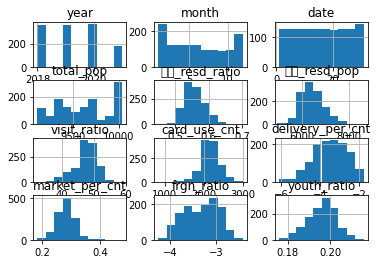

In [172]:
feature_df.hist()

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'date'}>],
       [<AxesSubplot:title={'center':'total_pop'}>,
        <AxesSubplot:title={'center':'제주_resd_ratio'}>,
        <AxesSubplot:title={'center':'제주_resd_pop'}>],
       [<AxesSubplot:title={'center':'visit_ratio'}>,
        <AxesSubplot:title={'center':'card_use_cnt'}>,
        <AxesSubplot:title={'center':'delivery_per_cnt'}>],
       [<AxesSubplot:title={'center':'market_per_cnt'}>,
        <AxesSubplot:title={'center':'frgn_ratio'}>,
        <AxesSubplot:title={'center':'youth_ratio'}>]], dtype=object)

c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)


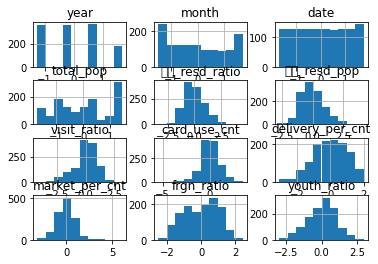

In [173]:
# scailing
scaler = StandardScaler()
scaler.fit(feature_df)

scaled_feature_df = scaler.transform(feature_df)
scaled_feature_df = pd.DataFrame(scaled_feature_df, index = feature_df.index, columns = feature_df.columns)
scaled_feature_df.hist()

In [174]:
feature_df.head(3)

,year,month,date,total_pop,제주_resd_ratio,제주_resd_pop,visit_ratio,card_use_cnt,delivery_per_cnt,market_per_cnt,frgn_ratio,youth_ratio
0,2018,1,1,10028,0.552623,7274.890502,49.642958,1806.0,-5.889432,0.326135,-3.259004,0.200261
38,2018,1,2,10028,0.558504,6937.805642,45.943924,1851.0,-4.831180,0.322350,-3.263707,0.204536
76,2018,1,3,10028,0.560474,6887.890984,45.064675,1896.0,-4.328626,0.318565,-3.320701,0.200898


In [175]:
scaled_feature_df.head(5)

,year,month,date,total_pop,제주_resd_ratio,제주_resd_pop,visit_ratio,card_use_cnt,delivery_per_cnt,market_per_cnt,frgn_ratio,youth_ratio
0,-1.247782,-1.488244,-1.672675,1.417128,-0.148399,1.582151,0.608540,-1.467623,-2.795752,1.382765,0.174267,0.635815
38,-1.247782,-1.488244,-1.558972,1.417128,0.035161,0.935127,-0.417287,-1.282142,-1.561845,1.264513,0.161581,1.275449
76,-1.247782,-1.488244,-1.445268,1.417128,0.096627,0.839318,-0.661123,-1.096661,-0.975874,1.146261,0.007862,0.731130
114,-1.247782,-1.488244,-1.331564,1.417128,-0.691941,0.356577,-0.143247,-1.665469,-1.483376,0.967863,0.246800,0.623156
152,-1.247782,-1.488244,-1.217860,1.417128,-0.184508,0.691832,-0.403071,-1.376943,-1.528903,2.524916,-0.153101,0.786232


In [186]:
# 년월일 빼기
scaled_feature_df = scaled_feature_df[['total_pop', '제주_resd_ratio', '제주_resd_pop',
       'visit_ratio', 'card_use_cnt', 'delivery_per_cnt', 'market_per_cnt',
       'frgn_ratio', 'youth_ratio']]

In [185]:
scaled_feature_df.columns

Index(['year', 'month', 'date', 'total_pop', '제주_resd_ratio', '제주_resd_pop',
       'visit_ratio', 'card_use_cnt', 'delivery_per_cnt', 'market_per_cnt',
       'frgn_ratio', 'youth_ratio'],
      dtype='object')

In [122]:
# feature_df['total_pop'] = scaled_sc['total_pop']
# feature_df['delivery_per_cnt'] = scaled_sc['delivery_per_cnt']
# feature_df['frgn_ratio'] = scaled_sc['frgn_ratio']
# feature_df.head(3)

,year,month,date,total_pop,제주_resd_ratio,제주_resd_pop,visit_ratio,card_use_cnt,delivery_per_cnt,market_per_cnt,frgn_ratio,youth_ratio
0,2018,1,1,0.723636,0.552623,7274.890502,49.642958,1806.0,-1.777774,0.326135,0.004543,0.200261
38,2018,1,2,0.723636,0.558504,6937.805642,45.943924,1851.0,-0.357327,0.322350,-1.206350,0.204536
76,2018,1,3,0.723636,0.560474,6887.890984,45.064675,1896.0,-0.599453,0.318565,-0.414130,0.200898


In [176]:
scaled_feature_df.isna().sum()

year                0
month               0
date                0
total_pop           0
제주_resd_ratio       0
제주_resd_pop         0
visit_ratio         0
card_use_cnt        0
delivery_per_cnt    0
market_per_cnt      0
frgn_ratio          0
youth_ratio         0
dtype: int64

### 분할

In [211]:
# train/ valid로 분할
X_train, X_valid, y_train, y_valid = train_test_split(feature_df, target_df, test_size = 0.3, random_state = 45)

### 모델링

In [212]:
# Ordinary Least Sqaure regression
def ols(train_x, train_y, valid_x, valid_y):
    linreg = LinearRegression(n_jobs=-1)
    linreg_fit = linreg.fit(train_x, train_y)
    pred = linreg.predict(valid_x)
    
    r_squared = linreg.score(train_x, train_y)
    valid_score = linreg.score(valid_x, valid_y)
    rmse = np.sqrt(np.mean((pred-valid_y).values**2))
    
    return pred, r_squared, valid_score,  rmse, linreg

valid_pred , r_squared, valid_score, rmse, linreg = ols(X_train, y_train, X_valid , y_valid)

In [213]:
# OLS result
print('R squared :', r_squared)
print('valid score : ' , valid_score)
print('RMSE :', rmse)

R squared : 0.9537913677262763
valid score :  0.9782418750470594
RMSE : 1850774.2924223738
